    - This code was taken from https://zhiyzuo.github.io/Linear-Regression-Diagnostic-in-Python/

In [1]:
import pyreadstat
import os 
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels

#lines below let allow multiple results from a line of code to be shown e.g. df.head() + df.columns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [51]:
os.chdir('C:\\Users\\Sam Cannon\\Desktop\\R\\Data Sets\\new_datasets_7e\\new_datasets_7e')

In [52]:
df = pd.read_csv("simple linear regression.csv")

In [53]:
df.head()

,Unnamed: 0,QUADS,GLUTS,ABDOMS,ARMS,GRIP,INJURY
0,1,35,27,30,11,0,159
1,2,40,26,28,36,5,238
2,3,46,27,28,28,12,195
3,4,36,27,12,24,10,212
4,5,61,34,37,25,18,199


In [54]:
#create composite column
df['total_strength'] = (df.QUADS + df.GLUTS + df.ABDOMS + df.ARMS + df.GRIP)/5

In [55]:
df.head()

,Unnamed: 0,QUADS,GLUTS,ABDOMS,ARMS,GRIP,INJURY,total_strength
0,1,35,27,30,11,0,159,20.6
1,2,40,26,28,36,5,238,27.0
2,3,46,27,28,28,12,195,28.2
3,4,36,27,12,24,10,212,21.8
4,5,61,34,37,25,18,199,35.0


In [56]:
#scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#separate features from target for scaling
scaled_data = df.drop(['INJURY', 'Unnamed: 0'], axis = 1)

#create index for column names
data_columns = scaled_data

#scale the data
scaled_data = scaler.fit_transform(scaled_data)

#convert back to a dataframe
scaled_data = pd.DataFrame(scaled_data, columns = data_columns.columns)

#add in the injury column
scaled_data['INJURY'] = df['INJURY']

scaled_data.head()

C:\Users\Sam Cannon\Python\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Sam Cannon\Python\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,QUADS,GLUTS,ABDOMS,ARMS,GRIP,total_strength,INJURY
0,-1.256547,-0.709018,0.150132,-2.283143,-1.743069,-1.617637,159
1,-0.735591,-0.882796,-0.073946,0.659052,-0.781110,-0.421049,238
2,-0.110443,-0.709018,-0.073946,-0.282451,0.565632,-0.196689,195
3,-1.152356,-0.709018,-1.866564,-0.753202,0.180848,-1.393277,212
4,1.452427,0.507434,0.934402,-0.635514,1.719982,1.074686,199


__Note: the scaled data is slightly different than how it is scaled in R for some reason, so the numbers do not match up exactly, but they are close__

In [58]:
import statsmodels.formula.api as smf
reg = smf.ols('INJURY ~ total_strength', data=scaled_data).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 INJURY   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     10.90
Date:                Thu, 18 Jul 2019   Prob (F-statistic):            0.00134
Time:                        22:35:22   Log-Likelihood:                -531.62
No. Observations:                 100   AIC:                             1067.
Df Residuals:                      98   BIC:                             1072.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        145.8000      4.977     29.297      0.000     135.924     155.676
total_strength   -16.4336      4.977     -3.302      0.001     -26.309      -6.558
==============================================================================
Omnibus:                        1.055   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.590   Jarque-Bera (JB):                0.691
Skew:                          -0.191   Prob(JB):                        0.708
Kurtosis:                       3.139   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Linear Assumptions
- check the regression for linearity and equal variance and normality

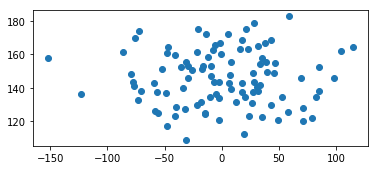

In [60]:
pred_val = reg.fittedvalues.copy()
true_val = df['INJURY'].values.copy()
residual = true_val - pred_val

fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(residual, pred_val)

__Check for normality with normal probability plot__

0.9912861365092347

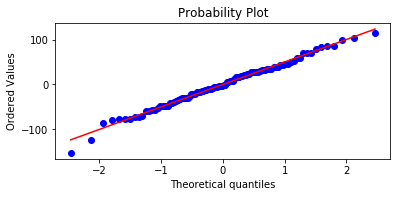

In [65]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)
r**2

This line seems to fit the data in a way that indicates normality